/home/user/anaconda3/envs/comets_env/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm



Abundance Filtering (0.1% threshold):
  Original features: 993
  Filtered features: 429
  Features removed: 564
DATA DIAGNOSTICS
Original data shape: (1004, 429)
Number of samples: 1004
Number of features: 429
Number of classes: 14
Classes: ['Ahmedabad' 'Ajmer' 'Bhopal' 'Chennai' 'Cochin' 'Guwahati' 'Kolkata'
 'Lucknow' 'Ludhiana' 'Mangalore' 'Mumbai' 'Nagpur' 'New Delhi' 'Patna']
Class distribution: {'Ahmedabad': 65, 'Ajmer': 70, 'Bhopal': 65, 'Chennai': 89, 'Cochin': 96, 'Guwahati': 83, 'Kolkata': 84, 'Lucknow': 67, 'Ludhiana': 65, 'Mangalore': 65, 'Mumbai': 59, 'Nagpur': 67, 'New Delhi': 46, 'Patna': 83}
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.029129 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 23871
[LightGBM] [Info] Number of data points in 

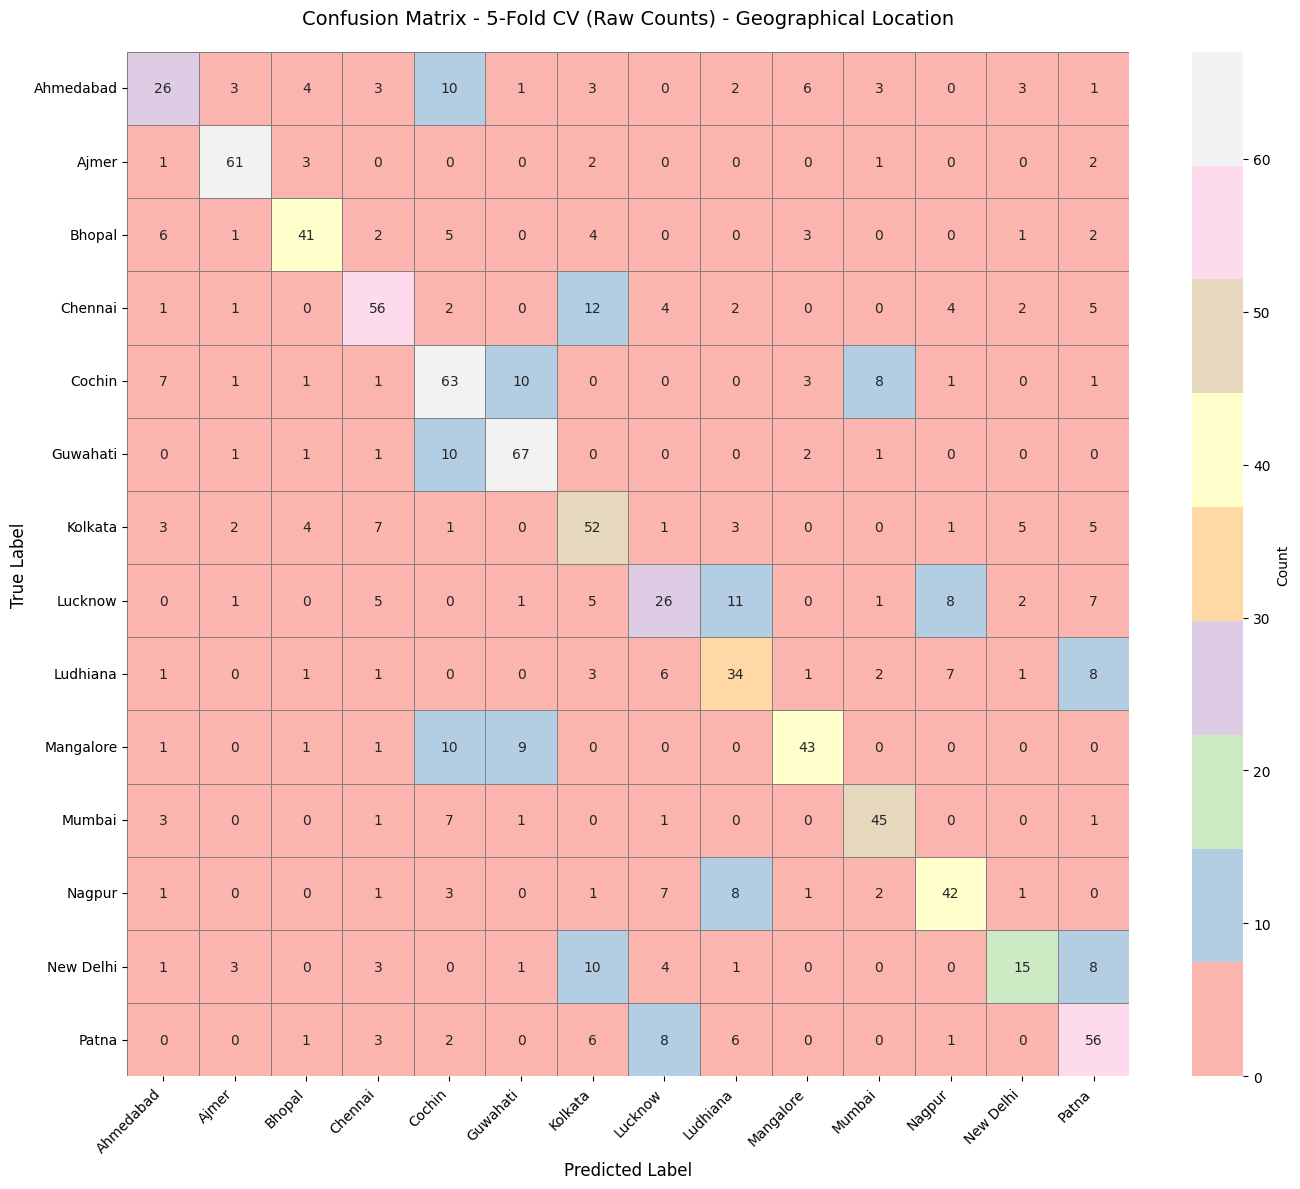

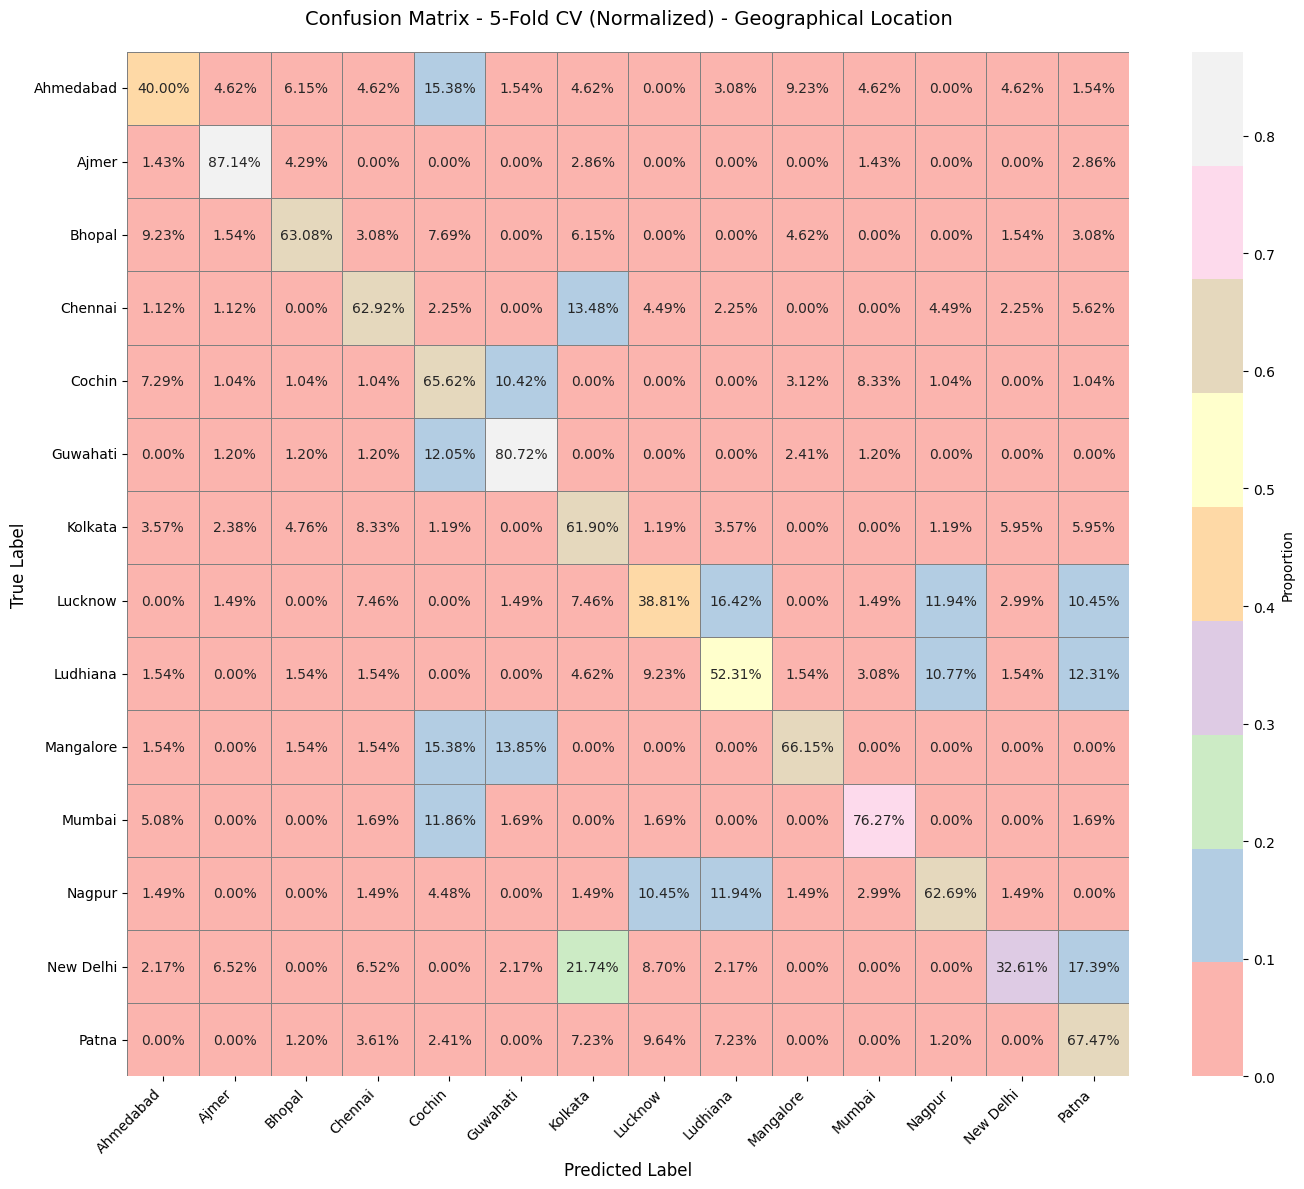

✅ CV confusion matrix plots displayed

Training on Full Data...

Full Data Confusion Matrix:
[[65  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 70  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 65  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 89  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 96  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 83  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 84  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 67  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 65  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 65  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 59  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 67  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 46  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0 83]]
Full Data Accuracy: 1.0000
✅ Saved: confusion_matrix_full_data_geolocation.csv
✅ Saved: confusion_matrix_normalized_full_data_geolocation.csv


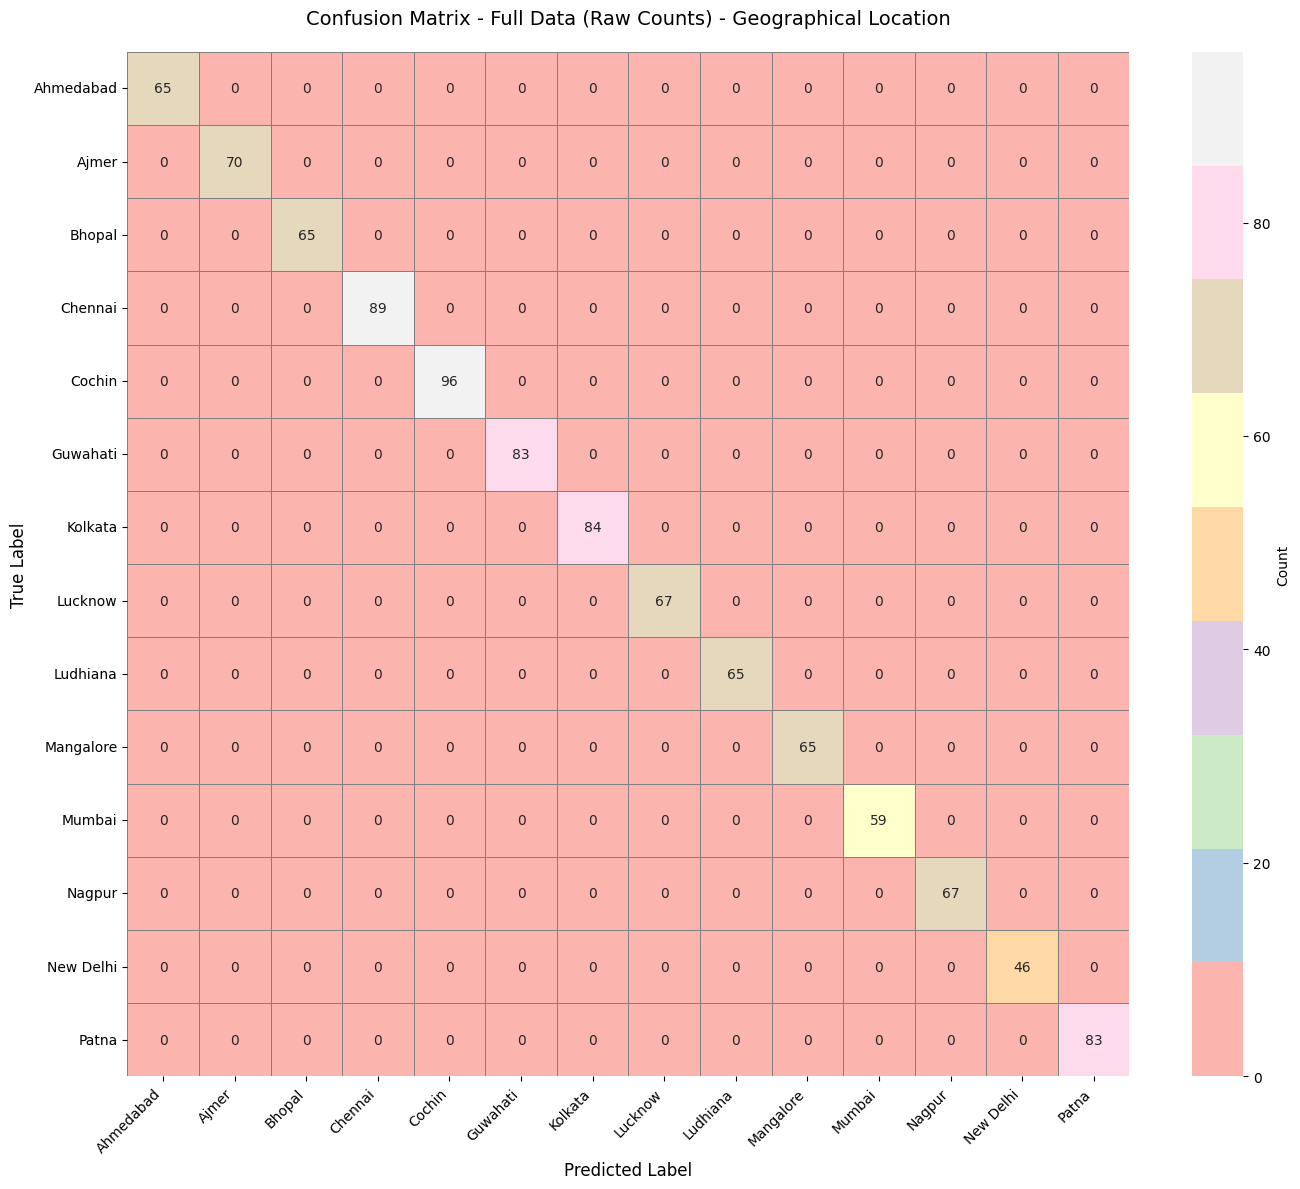

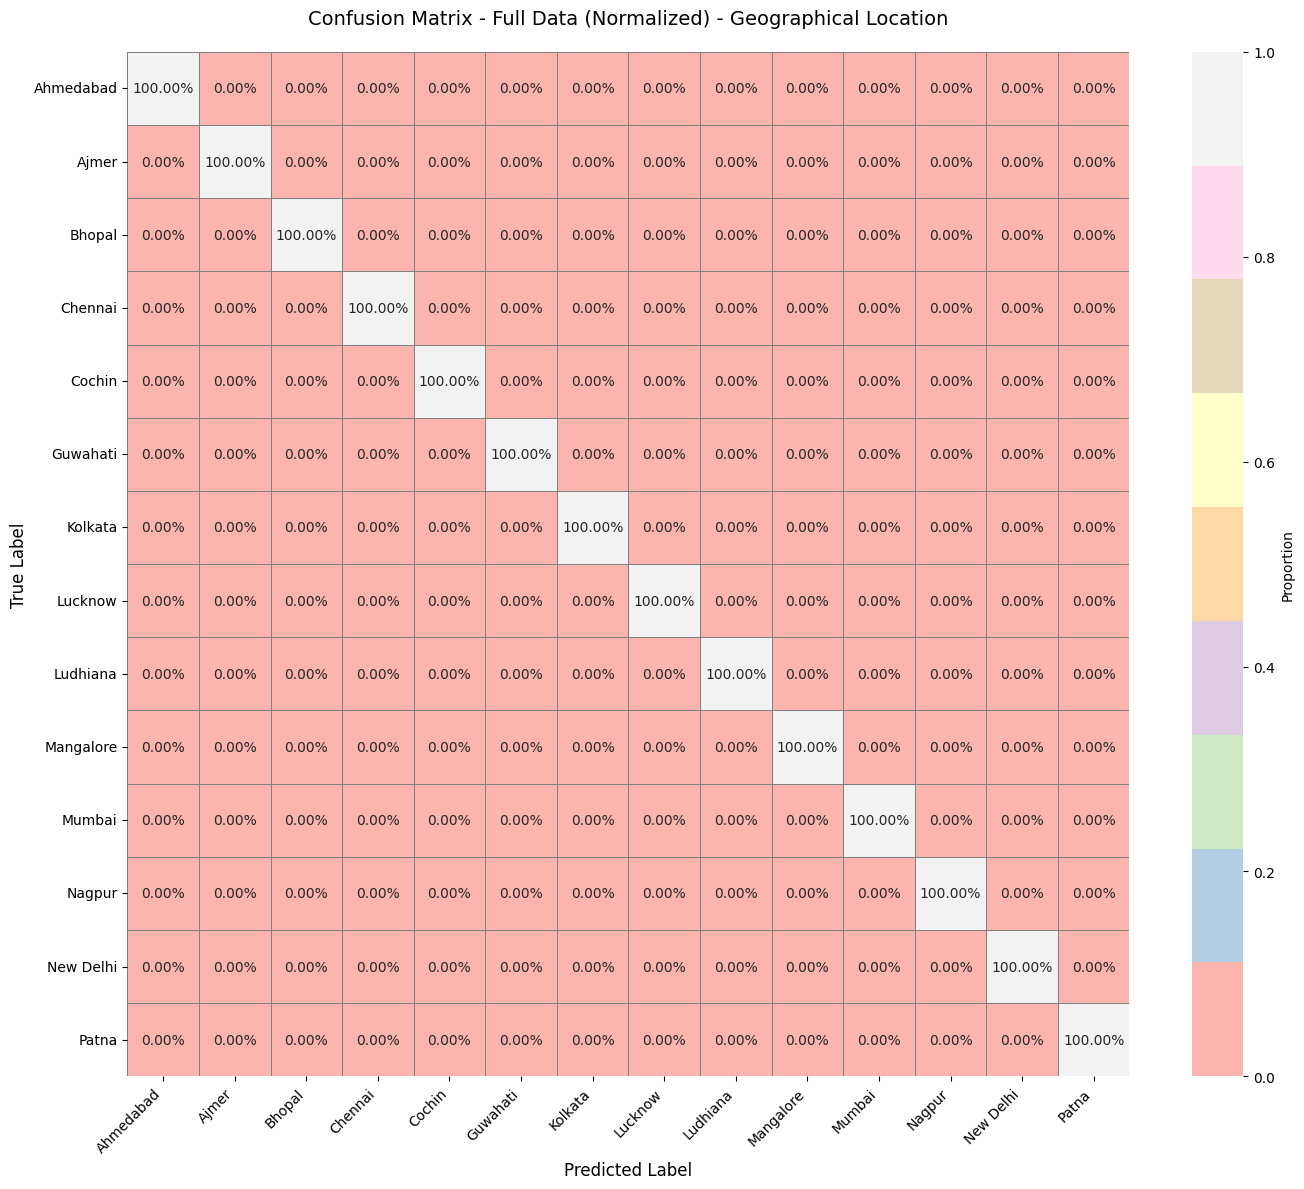

✅ Full data confusion matrix plots displayed

COMPUTING SUMMARY STATISTICS

Saving statistics to Excel...
✅ Saved: model_summary_statistics_geolocation.xlsx
   - Sheet 1: Model_Info
   - Sheet 2: Overall_Statistics
   - Sheet 3: Per_Class_Statistics
   - Sheet 4: Class_Distribution

OVERALL MODEL STATISTICS
                     Metric  Cross_Validation  Full_Data
           Overall Accuracy          0.624502        1.0
    Overall Accuracy (Mean)          0.624527        NaN
     Overall Accuracy (Std)          0.040019        NaN
     Overall Accuracy (Min)          0.562189        NaN
     Overall Accuracy (Max)          0.681592        NaN
   Macro-averaged Precision          0.620794        1.0
      Macro-averaged Recall          0.612641        1.0
          Macro-averaged F1          0.613399        1.0
Weighted-averaged Precision          0.622071        1.0
   Weighted-averaged Recall          0.624502        1.0
       Weighted-averaged F1          0.620342        1.0

PER-CL

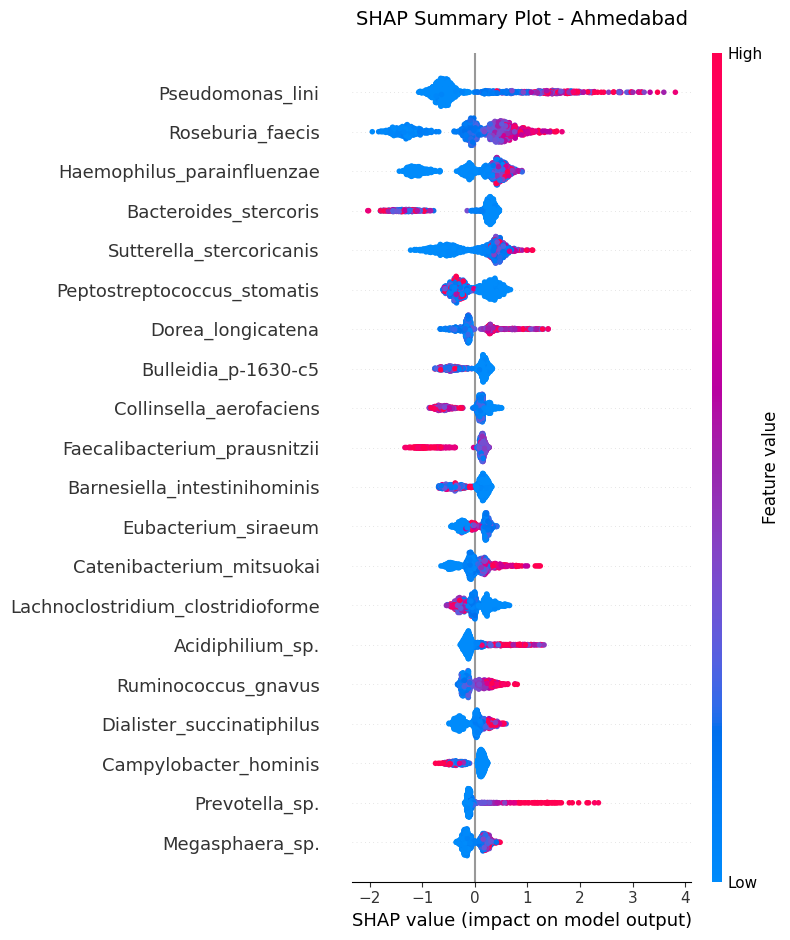

  ✅ Successfully plotted Ahmedabad

Processing Ajmer...


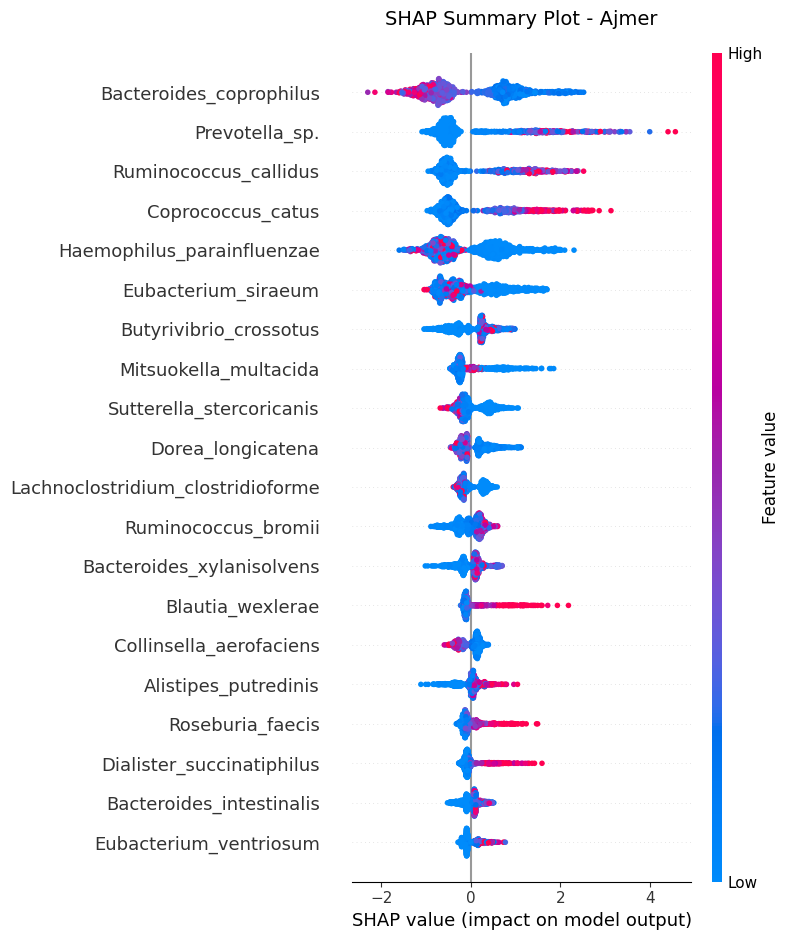

  ✅ Successfully plotted Ajmer

Processing Bhopal...


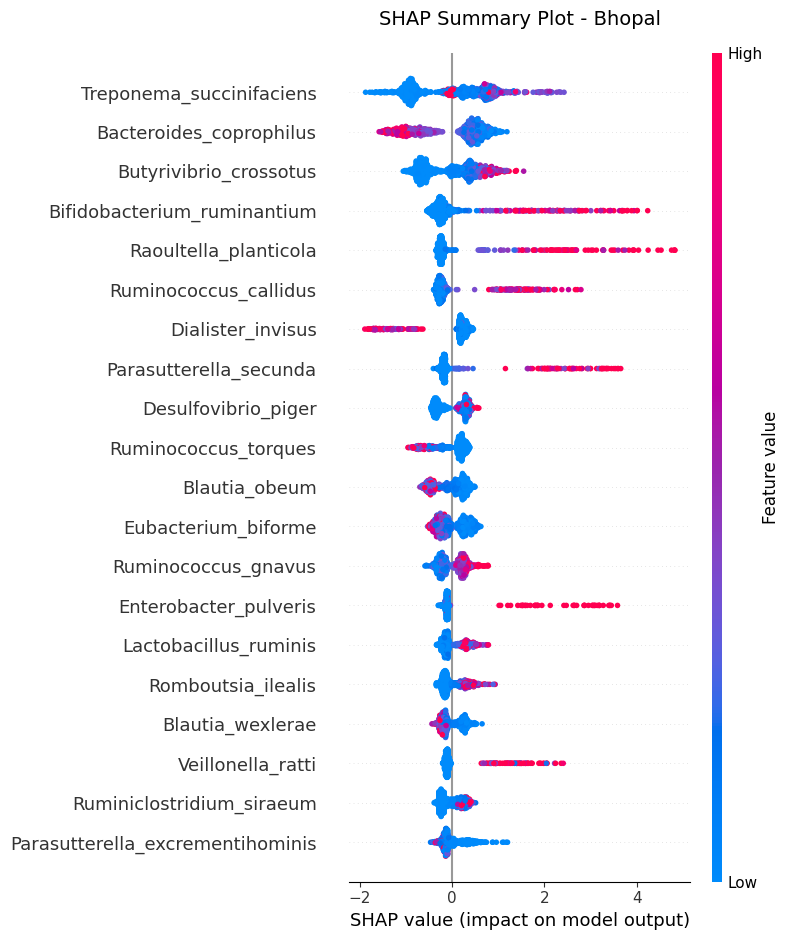

  ✅ Successfully plotted Bhopal

Processing Chennai...


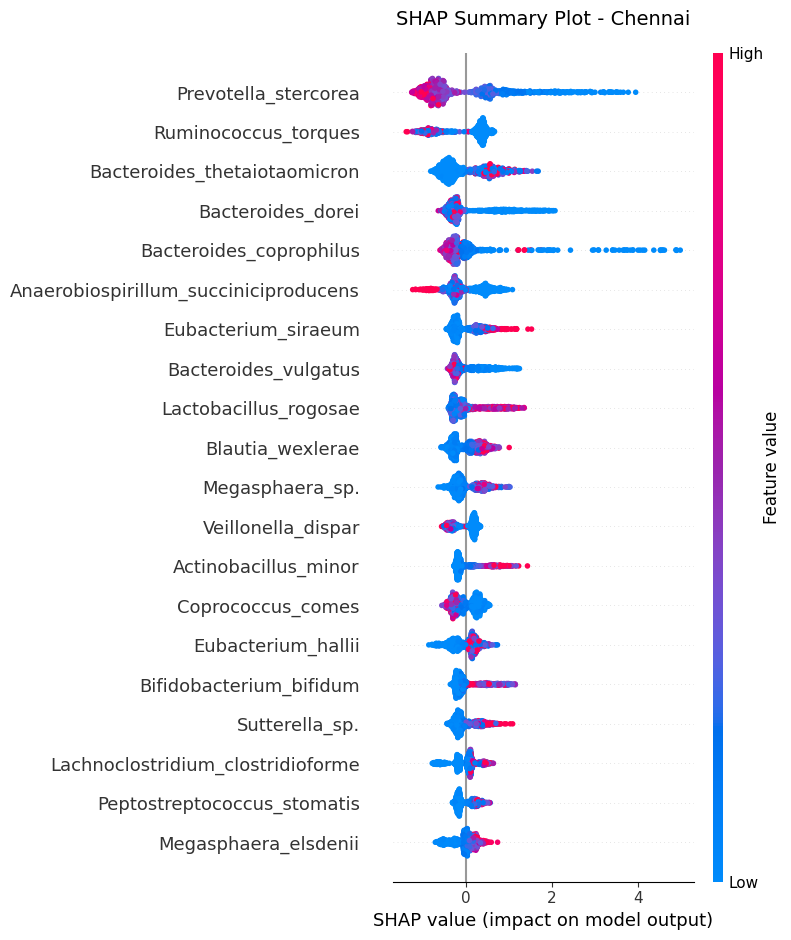

  ✅ Successfully plotted Chennai

Processing Cochin...


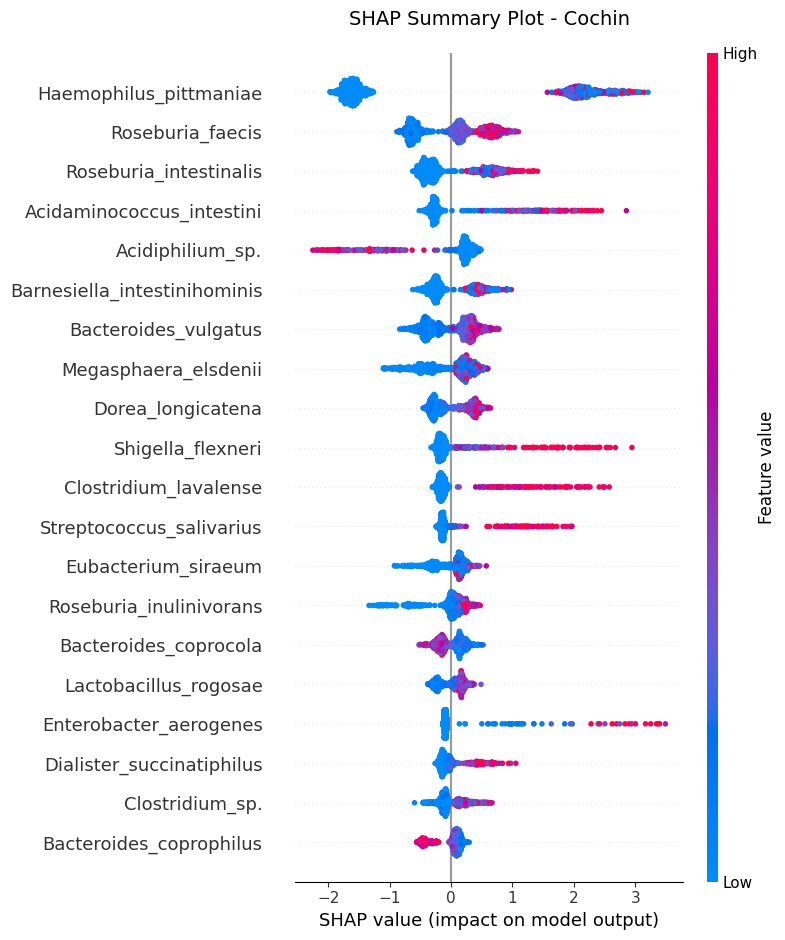

  ✅ Successfully plotted Cochin

Processing Guwahati...


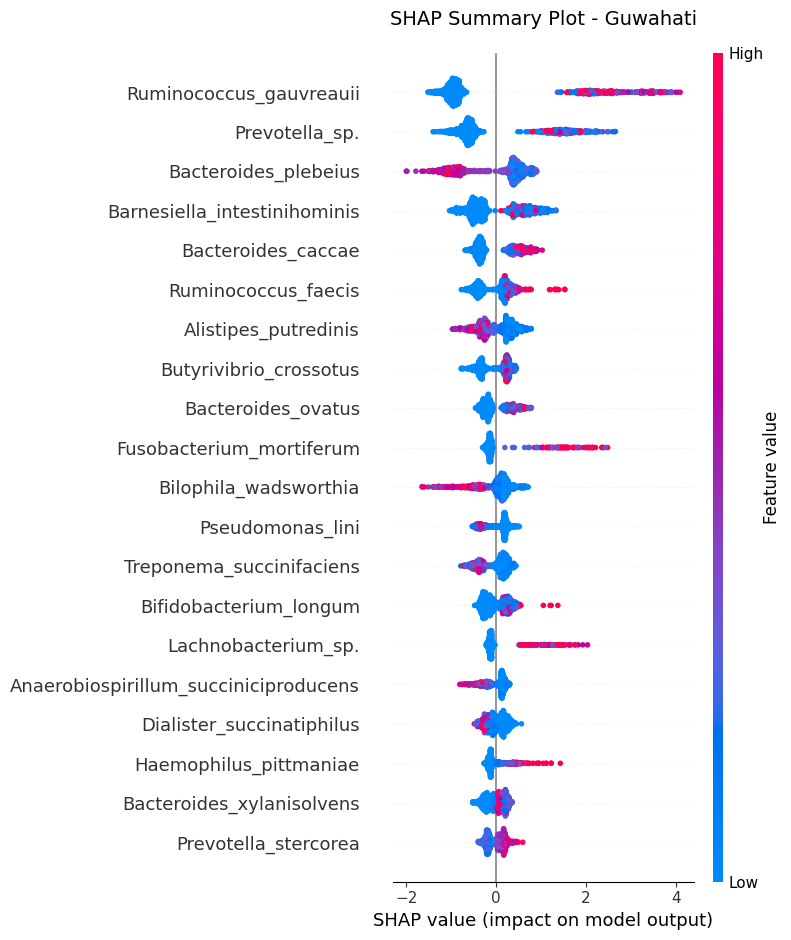

  ✅ Successfully plotted Guwahati

Processing Kolkata...


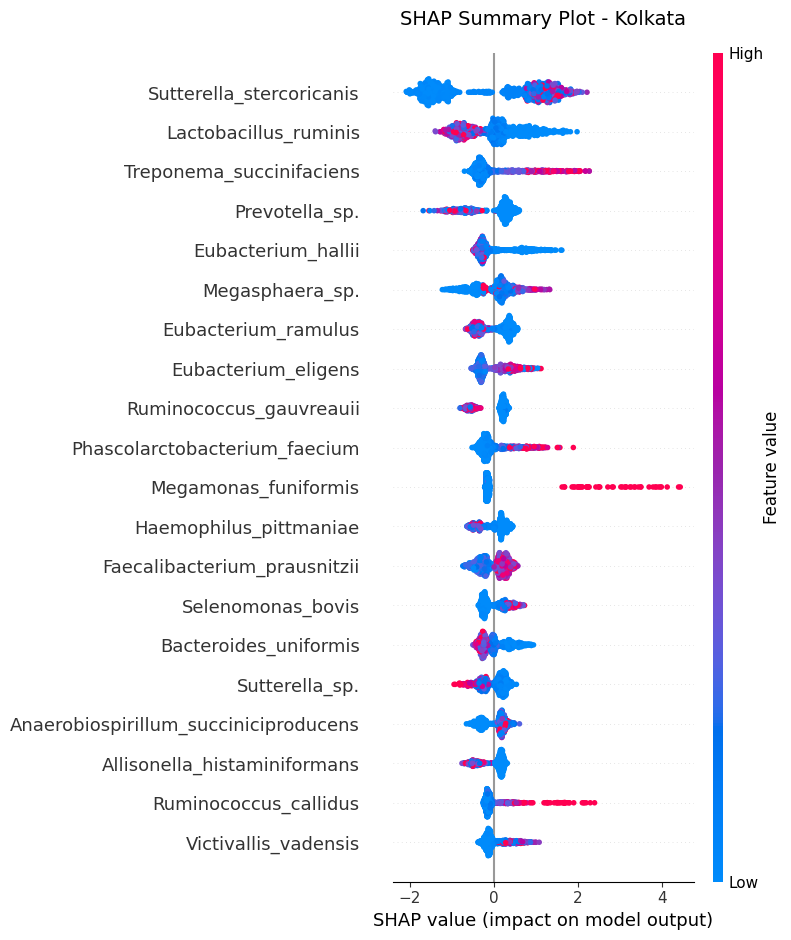

  ✅ Successfully plotted Kolkata

Processing Lucknow...


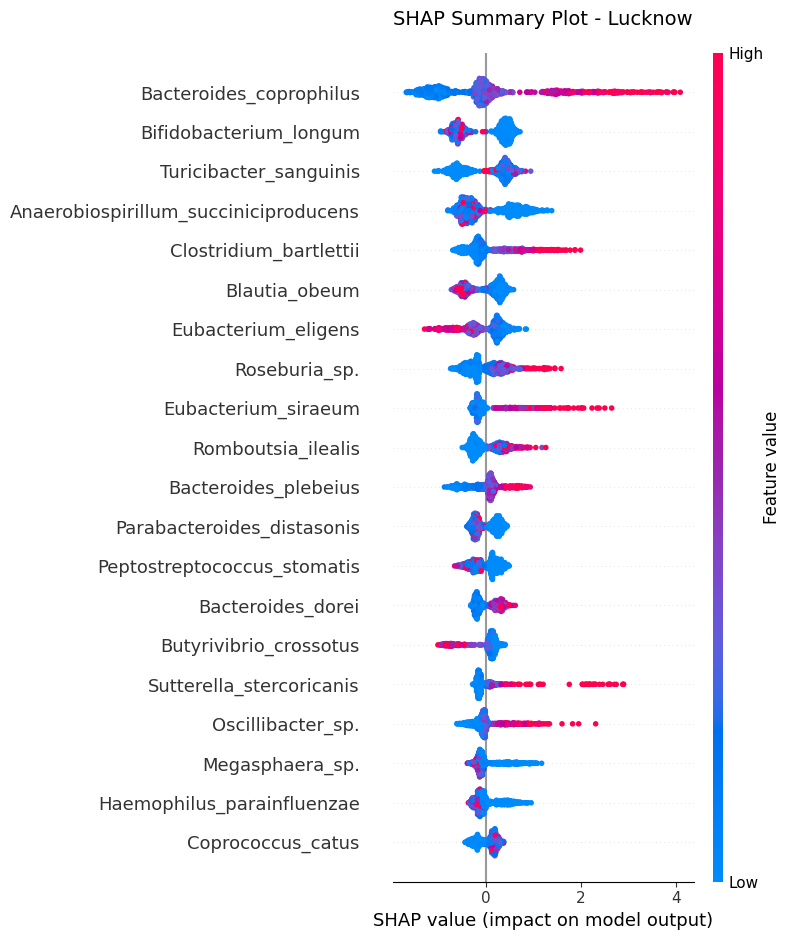

  ✅ Successfully plotted Lucknow

Processing Ludhiana...


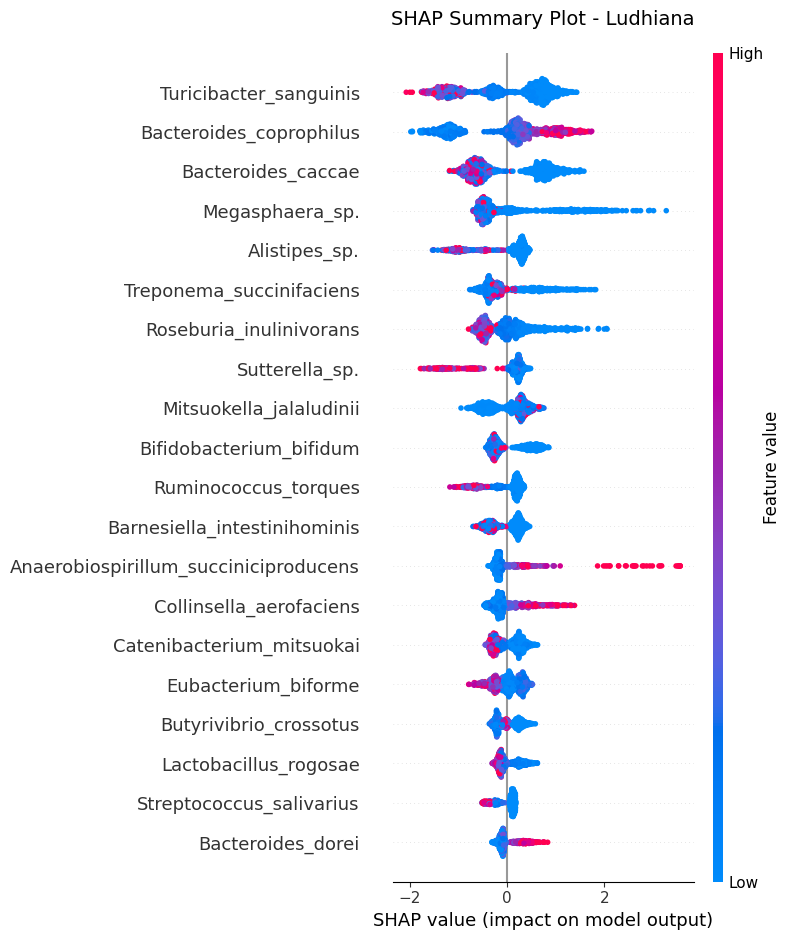

  ✅ Successfully plotted Ludhiana

Processing Mangalore...


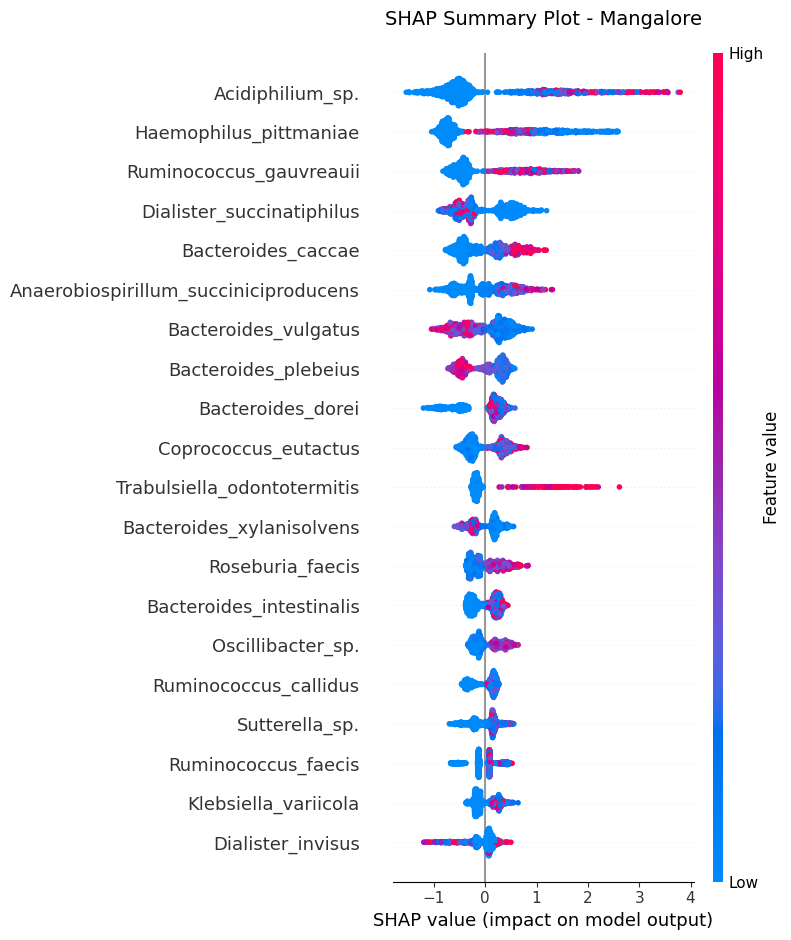

  ✅ Successfully plotted Mangalore

Processing Mumbai...


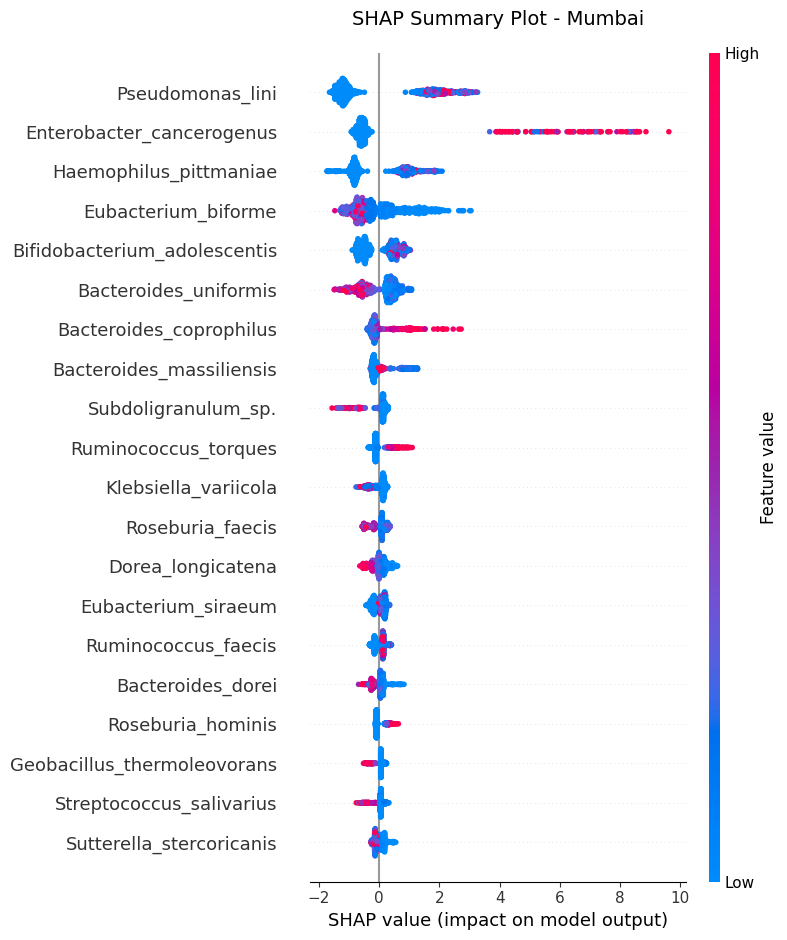

  ✅ Successfully plotted Mumbai

Processing Nagpur...


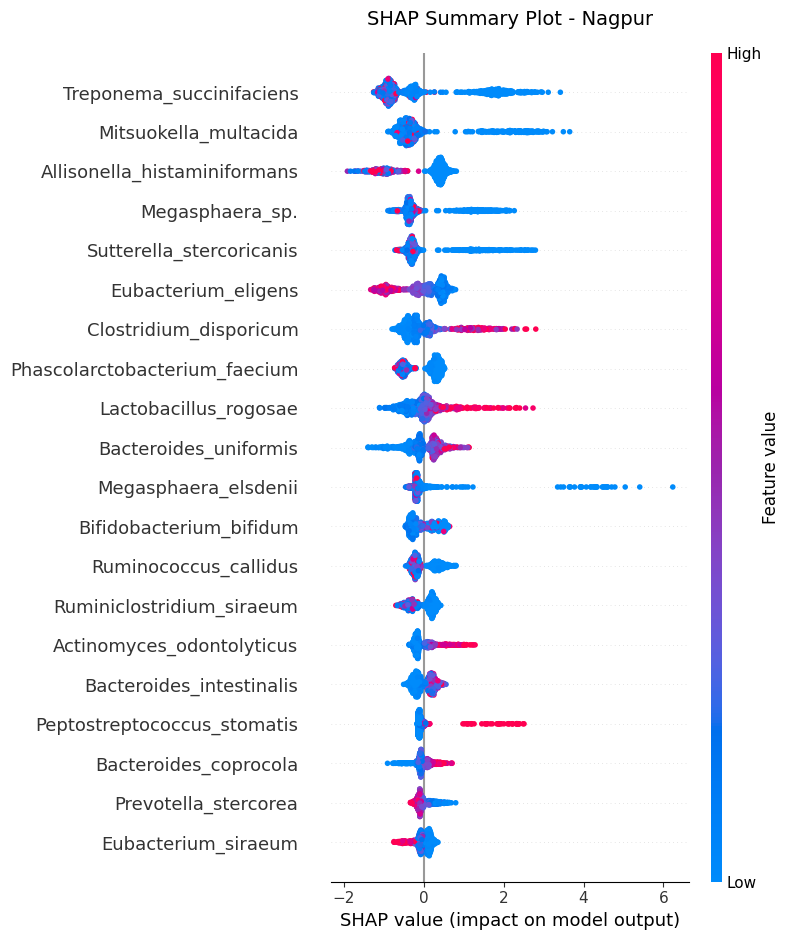

  ✅ Successfully plotted Nagpur

Processing New Delhi...


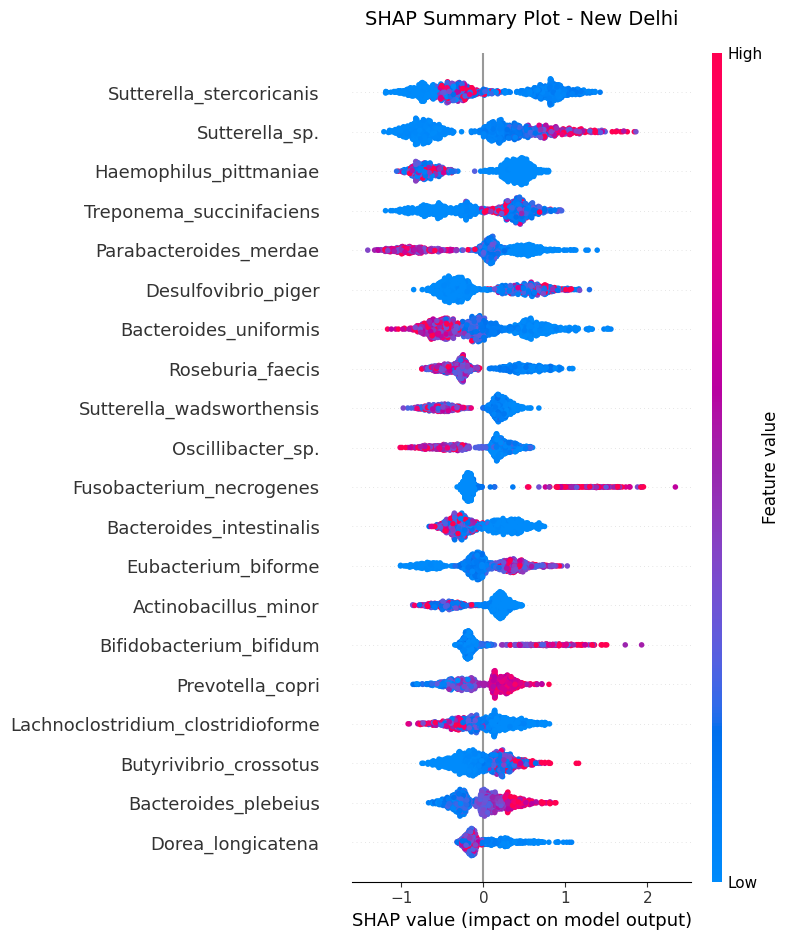

  ✅ Successfully plotted New Delhi

Processing Patna...


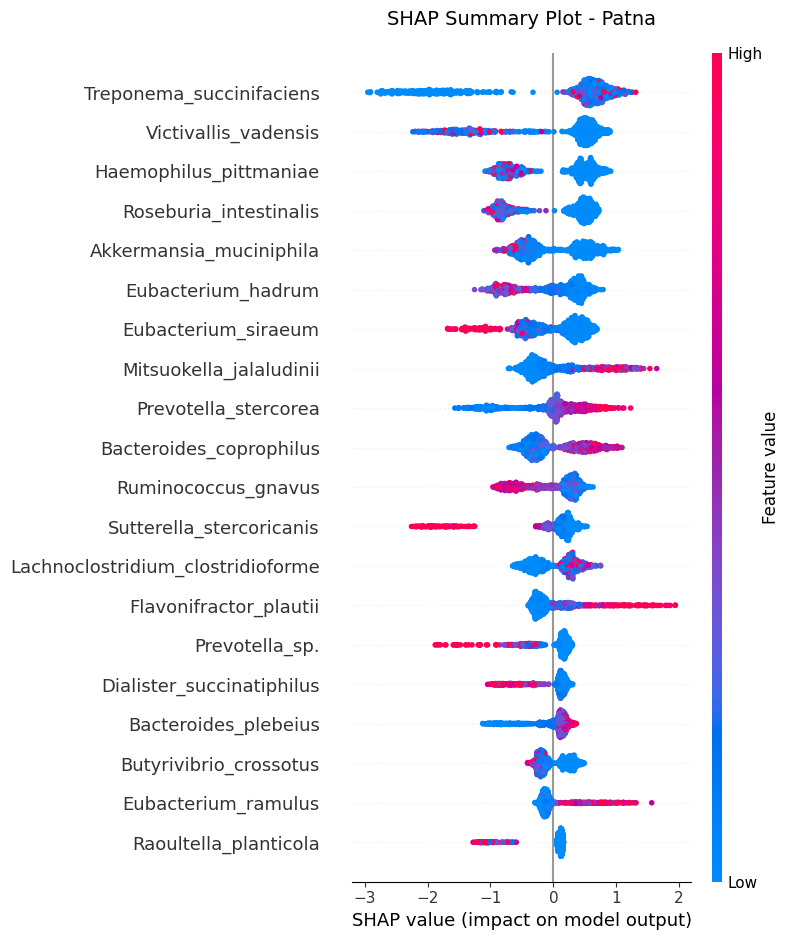

  ✅ Successfully plotted Patna

GENERATING MULTI-CLASS FEATURE IMPORTANCE BAR PLOT


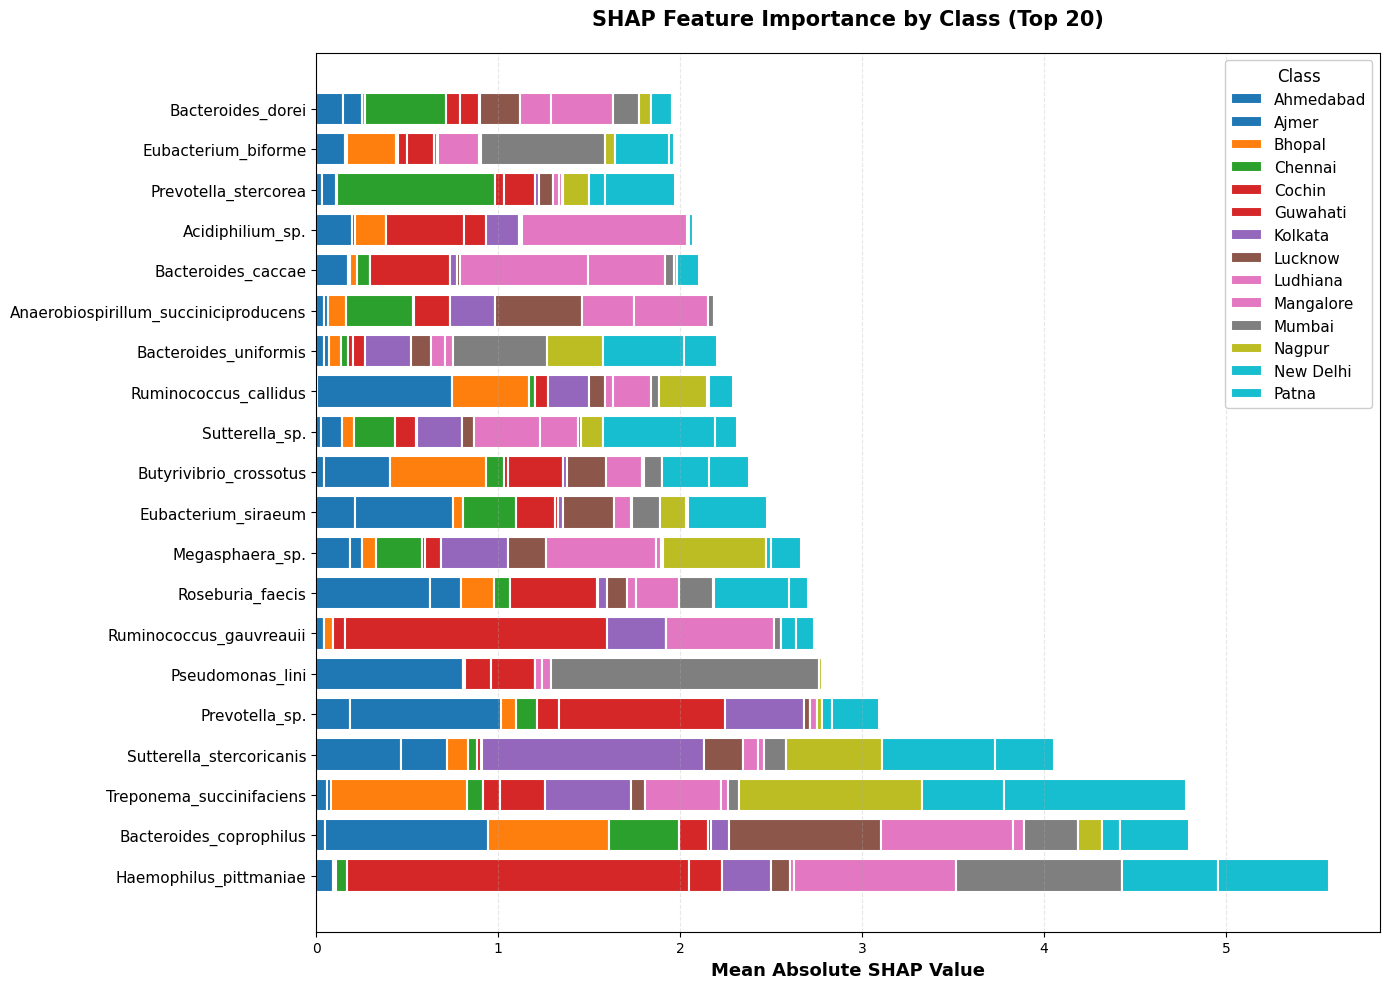

  ✅ Multi-class feature importance plot generated successfully
  📊 Saved as 'shap_feature_importance_by_class.png'

TOP 10 MOST IMPORTANT FEATURES
                 feature  importance
  Haemophilus_pittmaniae    5.568169
 Bacteroides_coprophilus    4.798396
Treponema_succinifaciens    4.780653
Sutterella_stercoricanis    4.057112
          Prevotella_sp.    3.094659
        Pseudomonas_lini    2.780091
 Ruminococcus_gauvreauii    2.738388
        Roseburia_faecis    2.702090
         Megasphaera_sp.    2.664019
     Eubacterium_siraeum    2.475089

✅ Saved: shap_feature_importance_geolocation.csv

ANALYSIS COMPLETE - GEOGRAPHICAL LOCATION MODEL


In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_recall_fscore_support
import lightgbm as lgb
import shap
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
from datetime import datetime


# ============================================================
# 0. SETUP
# ============================================================
rcParams['font.size'] = 10
rcParams['figure.dpi'] = 100


PASTEL_COLORS = ['#FFB3B3', '#FFD9B3', '#FFFFB3', '#B3FFB3', '#B3FFFF', '#B3D9FF', '#D9B3FF', '#FFB3D9',
                '#FFC0CB', '#E6E6FA', '#F0E68C', '#98FB98']


# ============================================================
# 1. DATA LOADING
# ============================================================
otu_file = r"/home/user/Documents/Sandhya/AI_in_medicine_lab/AI project/abundance_only.xlsx"
meta_file = r"/home/user/Documents/Sandhya/AI_in_medicine_lab/AI project/metadata_only.xlsx"


otu_raw = pd.read_excel(otu_file, index_col=0)
meta_raw = pd.read_excel(meta_file)


meta = meta_raw.set_index(meta_raw.columns[0])
target_col = 'Geographical Location'


meta = meta.dropna(subset=[target_col])
common_samples = list(set(otu_raw.index) & set(meta.index))
otu_aligned = otu_raw.loc[common_samples]
y = meta.loc[common_samples, target_col]


# ============================================================
# 2. ABUNDANCE FILTERING (0.1% cutoff)
# ============================================================
abundance_threshold = 0.001
feature_max_abundance = otu_aligned.max(axis=0)
features_to_keep = feature_max_abundance >= abundance_threshold


X = otu_aligned.loc[:, features_to_keep]


print(f"\nAbundance Filtering (0.1% threshold):")
print(f"  Original features: {otu_aligned.shape[1]}")
print(f"  Filtered features: {X.shape[1]}")
print(f"  Features removed: {otu_aligned.shape[1] - X.shape[1]}")


# ============================================================
# 3. ENCODE TARGET
# ============================================================
le = LabelEncoder()
y_encoded = le.fit_transform(y)


print("="*70)
print("DATA DIAGNOSTICS")
print("="*70)
print(f"Original data shape: {X.shape}")
print(f"Number of samples: {X.shape[0]}")
print(f"Number of features: {X.shape[1]}")
print(f"Number of classes: {len(le.classes_)}")
print(f"Classes: {le.classes_}")
print(f"Class distribution: {dict(zip(le.classes_, np.bincount(y_encoded)))}")


# ============================================================
# 4. MODEL TRAINING
# ============================================================
best_params = {
   'learning_rate': 0.12731818227197222,
   'max_depth': 4,
   'n_estimators': 153,
   'num_leaves': 13,
   'random_state': 42
}


model = lgb.LGBMClassifier(**best_params)
X_model = X.copy()


cv_outer = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X_model, y_encoded, cv=cv_outer, scoring='accuracy', n_jobs=-1)
print(f"\nCV Accuracy: {np.mean(cv_scores):.4f} ± {np.std(cv_scores):.4f}")


model.fit(X_model, y_encoded)


# ============================================================
# 5. SHAP ANALYSIS
# ============================================================
print("\n" + "="*70)
print("SHAP ANALYSIS (12 Classes)")
print("="*70)


explainer = shap.TreeExplainer(model)
print(f"TreeExplainer created successfully")


print("Calculating SHAP values...")
shap_values = explainer.shap_values(X_model)


print(f"SHAP values type: {type(shap_values)}")


def process_shap_values(shap_values, X_shape, n_classes):
   """Process SHAP values to ensure correct format"""
  
   if isinstance(shap_values, list):
       print("Processing list format SHAP values...")
       processed = []
       for i, sv in enumerate(shap_values):
           if sv.shape == X_shape:
               print(f"  Class {i}: Shape OK {sv.shape}")
               processed.append(sv)
           else:
               print(f"  Class {i}: Shape mismatch {sv.shape} vs {X_shape}")
               if sv.shape[0] == X_shape[0] and sv.shape[1] != X_shape[1]:
                   if sv.shape[1] == X_shape[1] + 1:
                       print(f"    Removing extra column (bias term)")
                       processed.append(sv[:, :-1])
                   elif sv.shape[1] < X_shape[1]:
                       print(f"    Padding with zeros")
                       padding = np.zeros((sv.shape[0], X_shape[1] - sv.shape[1]))
                       processed.append(np.hstack([sv, padding]))
                   else:
                       processed.append(None)
               else:
                   processed.append(None)
       return processed
  
   elif isinstance(shap_values, np.ndarray):
       if shap_values.ndim == 3:
           print(f"Processing 3D array: {shap_values.shape}")
           if shap_values.shape[0] == X_shape[0] and shap_values.shape[2] == n_classes:
               print("Converting 3D to list format...")
               return [shap_values[:, :, i] for i in range(n_classes)]
           elif shap_values.shape[0] == X_shape[0] and shap_values.shape[1] == n_classes:
               print("Converting 3D (classes in middle) to list format...")
               return [shap_values[:, i, :] for i in range(n_classes)]
           else:
               return None
       elif shap_values.ndim == 2:
           if shap_values.shape == X_shape:
               return [shap_values]
           else:
               return None
  
   return None


shap_values_processed = process_shap_values(shap_values, X_model.shape, len(le.classes_))
shap_values_list = [sv for sv in shap_values_processed if sv is not None]
print(f"Successfully processed {len(shap_values_list)} SHAP arrays (expected: 12)")


# ============================================================
# 6. UTILITY FUNCTIONS
# ============================================================
def clean_feature_names(feature_names, max_length=50):
   cleaned_names = []
   for name in feature_names:
       clean_name = str(name)
       for prefix in ['Proteobacteria_', 'Alphaproteobacteria_', 'Betaproteobacteria_',
                      'Gammaproteobacteria_', 'Deltaproteobacteria_']:
           clean_name = clean_name.replace(prefix, '')
       parts = clean_name.split('_')
       if len(parts) > 3:
           clean_name = '_'.join(parts[-2:])
       if len(clean_name) > max_length:
           clean_name = clean_name[:max_length-3] + '...'
       cleaned_names.append(clean_name)
   return cleaned_names


# ============================================================
# 7. SHAP PLOTTING (with vibrant colors)
# ============================================================
def plot_shap_summary_safe(shap_values_list, X, le, max_display=20):
   """SHAP summary plotting with vibrant colors"""
   print("\n" + "="*70)
   print("GENERATING SHAP SUMMARY PLOTS")
   print("="*70)
  
   clean_names = clean_feature_names(X.columns)
  
   for i, sv in enumerate(shap_values_list):
       if sv is None:
           continue
          
       class_name = le.classes_[i] if i < len(le.classes_) else f"Class_{i}"
       print(f"\nProcessing {class_name}...")
      
       if sv.shape[1] != X.shape[1]:
           print(f"  ❌ Shape mismatch. Skipping.")
           continue
          
       try:
           X_temp = pd.DataFrame(X.values, columns=clean_names, index=X.index)
          
           plt.figure(figsize=(12, 8))
          
           shap.summary_plot(
               sv,
               X_temp,
               max_display=max_display,
               show=False
           )
          
           plt.title(f'SHAP Summary Plot - {class_name}', fontsize=14, pad=20)
           plt.tight_layout()
           plt.show()
           print(f"  ✅ Successfully plotted {class_name}")
          
       except Exception as e:
           print(f"  ❌ Error plotting {class_name}: {str(e)}")
           plt.close()


def plot_feature_importance_safe(shap_values_list, X, le, top_n=20):
   """Feature importance plotting with pastel colors"""
   print("\n" + "="*70)
   print("GENERATING FEATURE IMPORTANCE PLOT")
   print("="*70)
  
   clean_names = clean_feature_names(X.columns)
  
   valid_importance = []
   for i, sv in enumerate(shap_values_list):
       if sv is not None and sv.shape[1] == len(clean_names):
           importance = np.mean(np.abs(sv), axis=0)
           valid_importance.append(importance)
           class_name = le.classes_[i] if i < len(le.classes_) else f"Class_{i}"
           print(f"  Including {class_name}")
  
   if not valid_importance:
       print("❌ No valid SHAP arrays")
       return None
  
   if len(valid_importance) > 1:
       feature_importance = np.mean(valid_importance, axis=0)
       print(f"  Averaged across {len(valid_importance)} classes")
   else:
       feature_importance = valid_importance[0]
  
   importance_df = pd.DataFrame({
       'feature': clean_names[:len(feature_importance)],
       'importance': feature_importance
   }).sort_values('importance', ascending=False)
  
   plt.figure(figsize=(12, 8))
   top_features = importance_df.head(top_n)
   pastel_colors_extended = (PASTEL_COLORS * ((top_n // len(PASTEL_COLORS)) + 1))[:top_n]
  
   bars = plt.barh(range(len(top_features)), top_features['importance'], color=pastel_colors_extended)
   plt.yticks(range(len(top_features)), top_features['feature'], fontsize=10)
   plt.xlabel('Mean |SHAP value|', fontsize=12)
   plt.title(f'Top {top_n} Most Important Features (SHAP)', fontsize=14)
   plt.gca().invert_yaxis()
  
   for i, bar in enumerate(bars):
       width = bar.get_width()
       plt.text(width + width*0.01, bar.get_y() + bar.get_height()/2,
               f'{width:.3f}', ha='left', va='center', fontsize=8)
  
   plt.tight_layout()
   plt.show()
   print("  ✅ Feature importance plot generated")
  
   return importance_df


# ============================================================
# 8. CONFUSION MATRIX ANALYSIS
# ============================================================
print("\n" + "="*70)
print("CONFUSION MATRIX ANALYSIS")
print("="*70)


y_cv_pred = cross_val_predict(model, X_model, y_encoded, cv=cv_outer)
cm_cv = confusion_matrix(y_encoded, y_cv_pred)
cv_accuracy = accuracy_score(y_encoded, y_cv_pred)


print(f"\n5-Fold CV Confusion Matrix:")
print(cm_cv)
print(f"CV Accuracy: {cv_accuracy:.4f}")


print(f"\nClassification Report (5-Fold CV):")
print(classification_report(y_encoded, y_cv_pred, target_names=le.classes_))


cm_cv_normalized = cm_cv.astype('float') / cm_cv.sum(axis=1)[:, np.newaxis]


# Save CV results
cm_df = pd.DataFrame(
   cm_cv,
   index=[f'True {label}' for label in le.classes_],
   columns=[f'Pred {label}' for label in le.classes_]
)
cm_df.to_csv('confusion_matrix_cv_geolocation.csv')
print("✅ Saved: confusion_matrix_cv_geolocation.csv")


cm_norm_df = pd.DataFrame(
   cm_cv_normalized,
   index=[f'True {label}' for label in le.classes_],
   columns=[f'Pred {label}' for label in le.classes_]
)
cm_norm_df.to_csv('confusion_matrix_normalized_cv_geolocation.csv')
print("✅ Saved: confusion_matrix_normalized_cv_geolocation.csv")


# Plot CV confusion matrix
print("\nPlotting CV Confusion Matrices...")
plt.figure(figsize=(14, 12))
sns.heatmap(
   cm_cv,
   annot=True,
   fmt='d',
   cmap='Pastel1',
   cbar_kws={'label': 'Count'},
   xticklabels=le.classes_,
   yticklabels=le.classes_,
   linewidths=0.5,
   linecolor='gray'
)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.title('Confusion Matrix - 5-Fold CV (Raw Counts) - Geographical Location', fontsize=14, pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


plt.figure(figsize=(14, 12))
sns.heatmap(
   cm_cv_normalized,
   annot=True,
   fmt='.2%',
   cmap='Pastel1',
   cbar_kws={'label': 'Proportion'},
   xticklabels=le.classes_,
   yticklabels=le.classes_,
   linewidths=0.5,
   linecolor='gray'
)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.title('Confusion Matrix - 5-Fold CV (Normalized) - Geographical Location', fontsize=14, pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()
print("✅ CV confusion matrix plots displayed")


# Full data predictions
print("\nTraining on Full Data...")
y_pred_full = model.predict(X_model)
cm_full = confusion_matrix(y_encoded, y_pred_full)
full_accuracy = accuracy_score(y_encoded, y_pred_full)


print(f"\nFull Data Confusion Matrix:")
print(cm_full)
print(f"Full Data Accuracy: {full_accuracy:.4f}")


cm_full_normalized = cm_full.astype('float') / cm_full.sum(axis=1)[:, np.newaxis]


# Save full data results
cm_full_df = pd.DataFrame(
   cm_full,
   index=[f'True {label}' for label in le.classes_],
   columns=[f'Pred {label}' for label in le.classes_]
)
cm_full_df.to_csv('confusion_matrix_full_data_geolocation.csv')
print("✅ Saved: confusion_matrix_full_data_geolocation.csv")


cm_full_norm_df = pd.DataFrame(
   cm_full_normalized,
   index=[f'True {label}' for label in le.classes_],
   columns=[f'Pred {label}' for label in le.classes_]
)
cm_full_norm_df.to_csv('confusion_matrix_normalized_full_data_geolocation.csv')
print("✅ Saved: confusion_matrix_normalized_full_data_geolocation.csv")


# Plot full data confusion matrix
plt.figure(figsize=(14, 12))
sns.heatmap(
   cm_full,
   annot=True,
   fmt='d',
   cmap='Pastel1',
   cbar_kws={'label': 'Count'},
   xticklabels=le.classes_,
   yticklabels=le.classes_,
   linewidths=0.5,
   linecolor='gray'
)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.title('Confusion Matrix - Full Data (Raw Counts) - Geographical Location', fontsize=14, pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


plt.figure(figsize=(14, 12))
sns.heatmap(
   cm_full_normalized,
   annot=True,
   fmt='.2%',
   cmap='Pastel1',
   cbar_kws={'label': 'Proportion'},
   xticklabels=le.classes_,
   yticklabels=le.classes_,
   linewidths=0.5,
   linecolor='gray'
)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.title('Confusion Matrix - Full Data (Normalized) - Geographical Location', fontsize=14, pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()
print("✅ Full data confusion matrix plots displayed")


# ============================================================
# 9. COMPUTE SUMMARY STATISTICS AND SAVE TO EXCEL
# ============================================================
print("\n" + "="*70)
print("COMPUTING SUMMARY STATISTICS")
print("="*70)


# Get per-class metrics from CV predictions
precision_cv, recall_cv, f1_cv, support_cv = precision_recall_fscore_support(
    y_encoded, y_cv_pred, average=None, labels=range(len(le.classes_))
)

# Get per-class metrics from full data predictions
precision_full, recall_full, f1_full, support_full = precision_recall_fscore_support(
    y_encoded, y_pred_full, average=None, labels=range(len(le.classes_))
)

# Create per-class statistics dataframe
per_class_stats = []
for i, class_name in enumerate(le.classes_):
    # CV stats
    class_mask_cv = (y_encoded == i)
    n_samples = np.sum(class_mask_cv)
    n_correct_cv = np.sum((y_encoded == i) & (y_cv_pred == i))
    
    # Full data stats
    n_correct_full = np.sum((y_encoded == i) & (y_pred_full == i))
    
    per_class_stats.append({
        'Class': class_name,
        'N_Samples': int(n_samples),
        
        # CV Metrics
        'CV_N_Correct': int(n_correct_cv),
        'CV_N_Incorrect': int(n_samples - n_correct_cv),
        'CV_Class_Accuracy': n_correct_cv / n_samples if n_samples > 0 else 0,
        'CV_Precision': precision_cv[i],
        'CV_Recall': recall_cv[i],
        'CV_F1_Score': f1_cv[i],
        
        # Full Data Metrics
        'Full_N_Correct': int(n_correct_full),
        'Full_N_Incorrect': int(n_samples - n_correct_full),
        'Full_Class_Accuracy': n_correct_full / n_samples if n_samples > 0 else 0,
        'Full_Precision': precision_full[i],
        'Full_Recall': recall_full[i],
        'Full_F1_Score': f1_full[i],
    })

per_class_df = pd.DataFrame(per_class_stats)


# Create overall model statistics dataframe
overall_stats = {
    'Metric': [
        'Overall Accuracy',
        'Overall Accuracy (Mean)',
        'Overall Accuracy (Std)',
        'Overall Accuracy (Min)',
        'Overall Accuracy (Max)',
        'Macro-averaged Precision',
        'Macro-averaged Recall',
        'Macro-averaged F1',
        'Weighted-averaged Precision',
        'Weighted-averaged Recall',
        'Weighted-averaged F1',
    ],
    'Cross_Validation': [
        accuracy_score(y_encoded, y_cv_pred),
        np.mean(cv_scores),
        np.std(cv_scores),
        np.min(cv_scores),
        np.max(cv_scores),
        np.mean(precision_cv),
        np.mean(recall_cv),
        np.mean(f1_cv),
        np.average(precision_cv, weights=support_cv),
        np.average(recall_cv, weights=support_cv),
        np.average(f1_cv, weights=support_cv),
    ],
    'Full_Data': [
        accuracy_score(y_encoded, y_pred_full),
        np.nan,  # Not applicable for full data
        np.nan,
        np.nan,
        np.nan,
        np.mean(precision_full),
        np.mean(recall_full),
        np.mean(f1_full),
        np.average(precision_full, weights=support_full),
        np.average(recall_full, weights=support_full),
        np.average(f1_full, weights=support_full),
    ]
}

overall_df = pd.DataFrame(overall_stats)


# Create model info dataframe
model_info_data = {
    'Parameter': [
        'Analysis Date',
        'Model Type',
        'Target Variable',
        'Total Samples',
        'Original Features',
        'Filtered Features',
        'Features Removed',
        'Number of Classes',
        'Abundance Threshold',
        'Learning Rate',
        'Max Depth',
        'N Estimators',
        'Num Leaves',
        'Random State',
    ],
    'Value': [
        datetime.now().strftime('%Y-%m-%d %H:%M:%S'),
        'LightGBM Classifier',
        target_col,
        len(y_encoded),
        otu_aligned.shape[1],
        X_model.shape[1],
        otu_aligned.shape[1] - X_model.shape[1],
        len(le.classes_),
        abundance_threshold,
        best_params['learning_rate'],
        best_params['max_depth'],
        best_params['n_estimators'],
        best_params['num_leaves'],
        best_params['random_state'],
    ]
}

model_info_df = pd.DataFrame(model_info_data)


# Create class distribution dataframe
class_dist_data = {
    'Class': le.classes_,
    'True_Count': [np.sum(y_encoded == i) for i in range(len(le.classes_))],
    'CV_Predicted_Count': [np.sum(y_cv_pred == i) for i in range(len(le.classes_))],
    'Full_Predicted_Count': [np.sum(y_pred_full == i) for i in range(len(le.classes_))],
}

class_dist_df = pd.DataFrame(class_dist_data)


# ============================================================
# 10. SAVE ALL STATISTICS TO EXCEL
# ============================================================
print("\nSaving statistics to Excel...")

# Save to a single Excel file with multiple sheets
excel_filename = 'model_summary_statistics_geolocation.xlsx'

with pd.ExcelWriter(excel_filename, engine='openpyxl') as writer:
    # Sheet 1: Model Information
    model_info_df.to_excel(writer, sheet_name='Model_Info', index=False)
    
    # Sheet 2: Overall Statistics
    overall_df.to_excel(writer, sheet_name='Overall_Statistics', index=False)
    
    # Sheet 3: Per-Class Statistics
    per_class_df.to_excel(writer, sheet_name='Per_Class_Statistics', index=False)
    
    # Sheet 4: Class Distribution
    class_dist_df.to_excel(writer, sheet_name='Class_Distribution', index=False)

print(f"✅ Saved: {excel_filename}")
print(f"   - Sheet 1: Model_Info")
print(f"   - Sheet 2: Overall_Statistics")
print(f"   - Sheet 3: Per_Class_Statistics")
print(f"   - Sheet 4: Class_Distribution")


# Display summary in console
print("\n" + "="*70)
print("OVERALL MODEL STATISTICS")
print("="*70)
print(overall_df.to_string(index=False))

print("\n" + "="*70)
print("PER-CLASS STATISTICS (CV)")
print("="*70)
print(per_class_df[['Class', 'N_Samples', 'CV_Precision', 'CV_Recall', 'CV_F1_Score']].to_string(index=False))


# ============================================================
# 11. SHAP PLOTS
# ============================================================
def plot_feature_importance_by_class(shap_values_list, X, le, top_n=20):
   """
   Generates a horizontal stacked bar plot showing feature importance
   broken down by class contribution.
   """
   print("\n" + "="*60)
   print("GENERATING MULTI-CLASS FEATURE IMPORTANCE BAR PLOT")
   print("="*60)
  
   if len(shap_values_list) != len(le.classes_):
       print(f"❌ SHAP array count mismatch: Expected {len(le.classes_)}, got {len(shap_values_list)}")
       return None
  
   if not shap_values_list or shap_values_list[0].shape[1] != X.shape[1]:
       print("❌ Invalid SHAP values shape")
       return None
  
   clean_names = clean_feature_names(X.columns)
  
   try:
       # Calculate mean absolute SHAP values per class per feature
       importance_by_class = np.array([
           np.mean(np.abs(sv), axis=0) for sv in shap_values_list
       ])
      
       # Sum across classes to get total importance per feature
       total_importance = np.sum(importance_by_class, axis=0)
      
       # Get top features
       top_indices = np.argsort(total_importance)[-top_n:][::-1]
      
       # Subset data
       importance_subset = importance_by_class[:, top_indices]
       top_features = [clean_names[i] for i in top_indices]
      
       # Create color map for classes
       colors = plt.cm.tab10(np.linspace(0, 1, len(le.classes_)))
      
       # Create figure
       fig, ax = plt.subplots(figsize=(14, 10))
      
       # Build stacked horizontal bars
       feature_range = np.arange(len(top_features))
       left = np.zeros(len(top_features))
      
       for class_idx, class_name in enumerate(le.classes_):
           values = importance_subset[class_idx, :]
           ax.barh(feature_range, values, left=left, label=class_name,
                   color=colors[class_idx], edgecolor='white', linewidth=1.5)
           left += values
      
       # Customize plot
       ax.set_yticks(feature_range)
       ax.set_yticklabels(top_features, fontsize=11)
       ax.set_xlabel('Mean Absolute SHAP Value', fontsize=13, weight='bold')
       ax.set_title(f'SHAP Feature Importance by Class (Top {top_n})',
                    fontsize=15, weight='bold', pad=20)
       ax.legend(title='Class', title_fontsize=12, fontsize=11,
                 loc='upper right', framealpha=0.95)
       ax.grid(axis='x', alpha=0.3, linestyle='--')
      
       plt.tight_layout()
       plt.savefig('shap_feature_importance_by_class.png', dpi=150, bbox_inches='tight')
       plt.show()
      
       print(f"  ✅ Multi-class feature importance plot generated successfully")
       print(f"  📊 Saved as 'shap_feature_importance_by_class.png'")
      
       # Return importance dataframe
       overall_importance = pd.DataFrame({
           'feature': top_features,
           'importance': total_importance[top_indices]
       })
      
       return overall_importance
      
   except Exception as e:
       print(f"  ❌ Error generating plot: {str(e)}")
       import traceback
       traceback.print_exc()
       plt.close()
       return None


if len(shap_values_list) > 0:
   plot_shap_summary_safe(shap_values_list, X_model, le, max_display=20)
   importance_df = plot_feature_importance_by_class(shap_values_list, X_model, le, top_n=20)
  
   if importance_df is not None:
       print("\n" + "="*70)
       print("TOP 10 MOST IMPORTANT FEATURES")
       print("="*70)
       print(importance_df.head(10).to_string(index=False))
       importance_df.to_csv('shap_feature_importance_geolocation.csv', index=False)
       print("\n✅ Saved: shap_feature_importance_geolocation.csv")


print("\n" + "="*70)
print("ANALYSIS COMPLETE - GEOGRAPHICAL LOCATION MODEL")
print("="*70)


GENERATING MULTI-CLASS FEATURE IMPORTANCE BAR PLOT


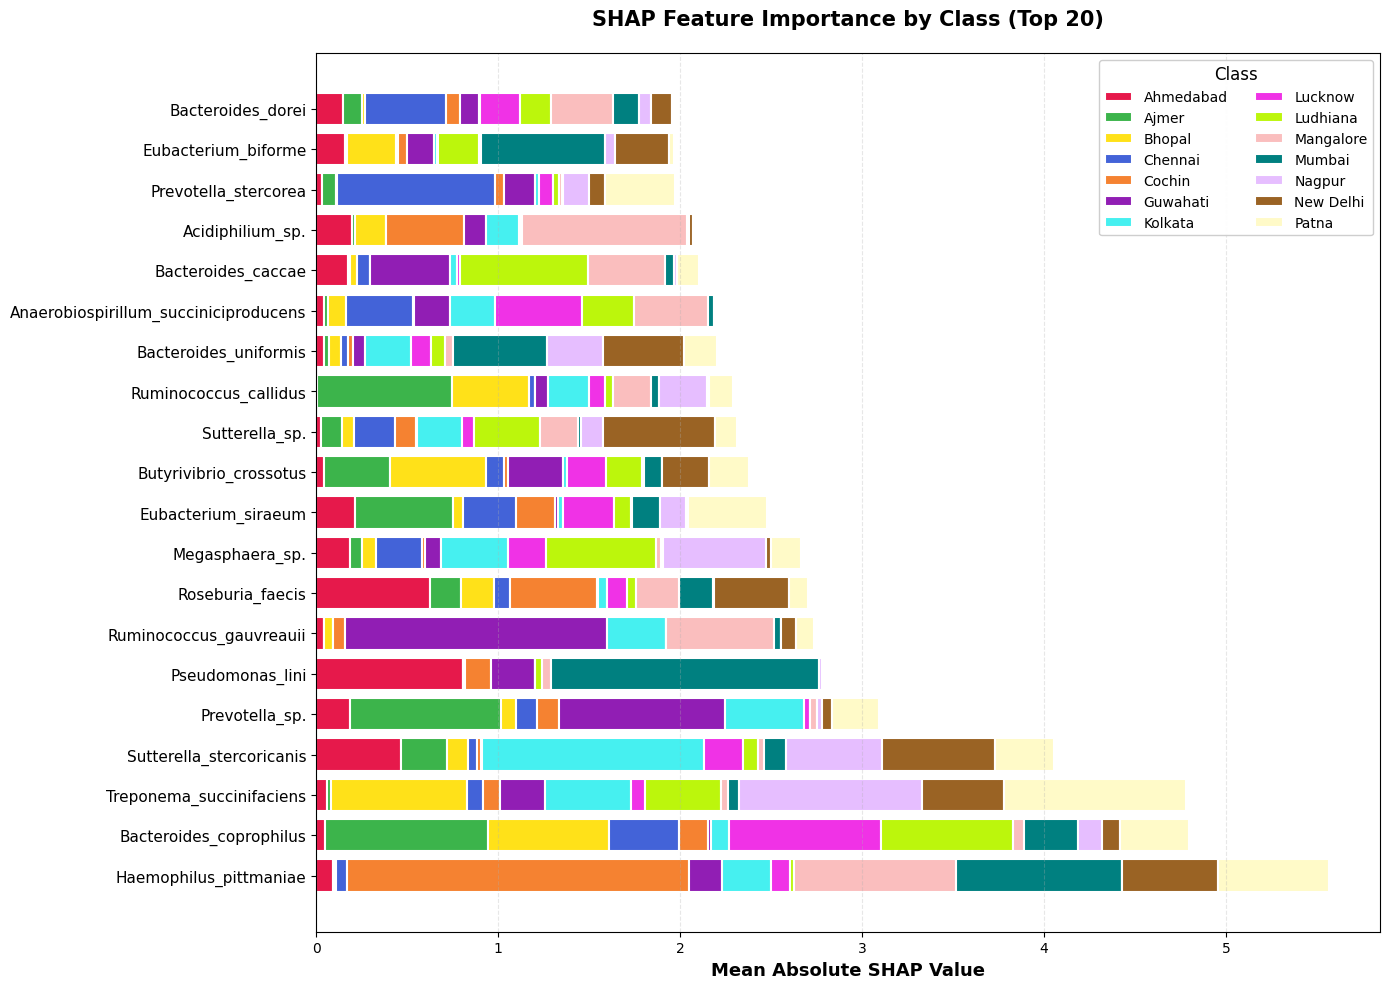

  ✅ Multi-class feature importance plot generated successfully
  📊 Saved as 'shap_feature_importance_by_class.png'
  🎨 Used 14 distinct colors for 14 classes


In [2]:
def plot_feature_importance_by_class(shap_values_list, X, le, top_n=20):
    """
    Generates a horizontal stacked bar plot showing feature importance
    broken down by class contribution with 14 distinct colors.
    """
    print("\n" + "="*60)
    print("GENERATING MULTI-CLASS FEATURE IMPORTANCE BAR PLOT")
    print("="*60)
    
    # Validation
    if len(shap_values_list) != len(le.classes_):
        print(f"❌ SHAP array count mismatch: Expected {len(le.classes_)}, got {len(shap_values_list)}")
        return None
    
    if not shap_values_list or shap_values_list[0].shape[1] != X.shape[1]:
        print("❌ Invalid SHAP values shape")
        return None
    
    clean_names = clean_feature_names(X.columns)
    
    try:
        # Calculate mean absolute SHAP values per class per feature
        # Shape: (n_classes, n_features)
        importance_by_class = np.array([
            np.mean(np.abs(sv), axis=0) for sv in shap_values_list
        ])
        
        # Sum across classes to get total importance per feature
        total_importance = np.sum(importance_by_class, axis=0)
        
        # Get top features
        top_indices = np.argsort(total_importance)[-top_n:][::-1]
        
        # Subset data
        importance_subset = importance_by_class[:, top_indices]  # (n_classes, top_n)
        top_features = [clean_names[i] for i in top_indices]
        
        # Create 14 distinct colors using multiple colormaps
        n_classes = len(le.classes_)
        
        if n_classes <= 10:
            # Use tab10 if 10 or fewer classes
            colors = plt.cm.tab10(np.linspace(0, 1, n_classes))
        elif n_classes <= 20:
            # Combine tab10 and tab20 for up to 20 classes
            colors_part1 = plt.cm.tab10(np.linspace(0, 1, 10))
            colors_part2 = plt.cm.tab20b(np.linspace(0, 1, n_classes - 10))
            colors = np.vstack([colors_part1, colors_part2])
        else:
            # Use Set3 for more classes
            colors = plt.cm.Set3(np.linspace(0, 1, n_classes))
        
        # Alternative: Define 14 custom distinct colors manually
        custom_14_colors = [
            '#e6194b',  # Red
            '#3cb44b',  # Green
            '#ffe119',  # Yellow
            '#4363d8',  # Blue
            '#f58231',  # Orange
            '#911eb4',  # Purple
            '#46f0f0',  # Cyan
            '#f032e6',  # Magenta
            '#bcf60c',  # Lime
            '#fabebe',  # Pink
            '#008080',  # Teal
            '#e6beff',  # Lavender
            '#9a6324',  # Brown
            '#fffac8'   # Beige
        ]
        
        # Use custom colors if exactly 14 classes
        if n_classes == 14:
            colors = [custom_14_colors[i] for i in range(14)]
        
        # Create figure
        fig, ax = plt.subplots(figsize=(14, 10))
        
        # Build stacked horizontal bars
        feature_range = np.arange(len(top_features))
        left = np.zeros(len(top_features))
        
        for class_idx, class_name in enumerate(le.classes_):
            values = importance_subset[class_idx, :]
            ax.barh(feature_range, values, left=left, label=class_name, 
                    color=colors[class_idx], edgecolor='white', linewidth=1.5)
            left += values
        
        # Customize plot
        ax.set_yticks(feature_range)
        ax.set_yticklabels(top_features, fontsize=11)
        ax.set_xlabel('Mean Absolute SHAP Value', fontsize=13, weight='bold')
        ax.set_title(f'SHAP Feature Importance by Class (Top {top_n})', 
                     fontsize=15, weight='bold', pad=20)
        
        # Adjust legend - use 2 columns if many classes
        if n_classes > 10:
            ax.legend(title='Class', title_fontsize=12, fontsize=10, 
                      loc='upper right', framealpha=0.95, ncol=2)
        else:
            ax.legend(title='Class', title_fontsize=12, fontsize=11, 
                      loc='upper right', framealpha=0.95)
        
        ax.grid(axis='x', alpha=0.3, linestyle='--')
        
        plt.tight_layout()
        plt.savefig('shap_feature_importance_by_class.png', dpi=150, bbox_inches='tight')
        plt.show()
        
        print(f"  ✅ Multi-class feature importance plot generated successfully")
        print(f"  📊 Saved as 'shap_feature_importance_by_class.png'")
        print(f"  🎨 Used {n_classes} distinct colors for {n_classes} classes")
        
        # Return importance dataframe
        overall_importance = pd.DataFrame({
            'feature': top_features,
            'importance': total_importance[top_indices]
        })
        
        return overall_importance
        
    except Exception as e:
        print(f"  ❌ Error generating plot: {str(e)}")
        import traceback
        traceback.print_exc()
        plt.close()
        return None
importance_df = plot_feature_importance_by_class(shap_values_list, X_model, le, top_n=20)

SHAP & CONFUSION MATRIX VISUALIZATION
Data shape: (1004, 429)
Number of classes: 14
Classes: ['Ahmedabad' 'Ajmer' 'Bhopal' 'Chennai' 'Cochin' 'Guwahati' 'Kolkata'
 'Lucknow' 'Ludhiana' 'Mangalore' 'Mumbai' 'Nagpur' 'New Delhi' 'Patna']

PLOTTING CONFUSION MATRICES

Generating CV Confusion Matrices with Gradient Colors...


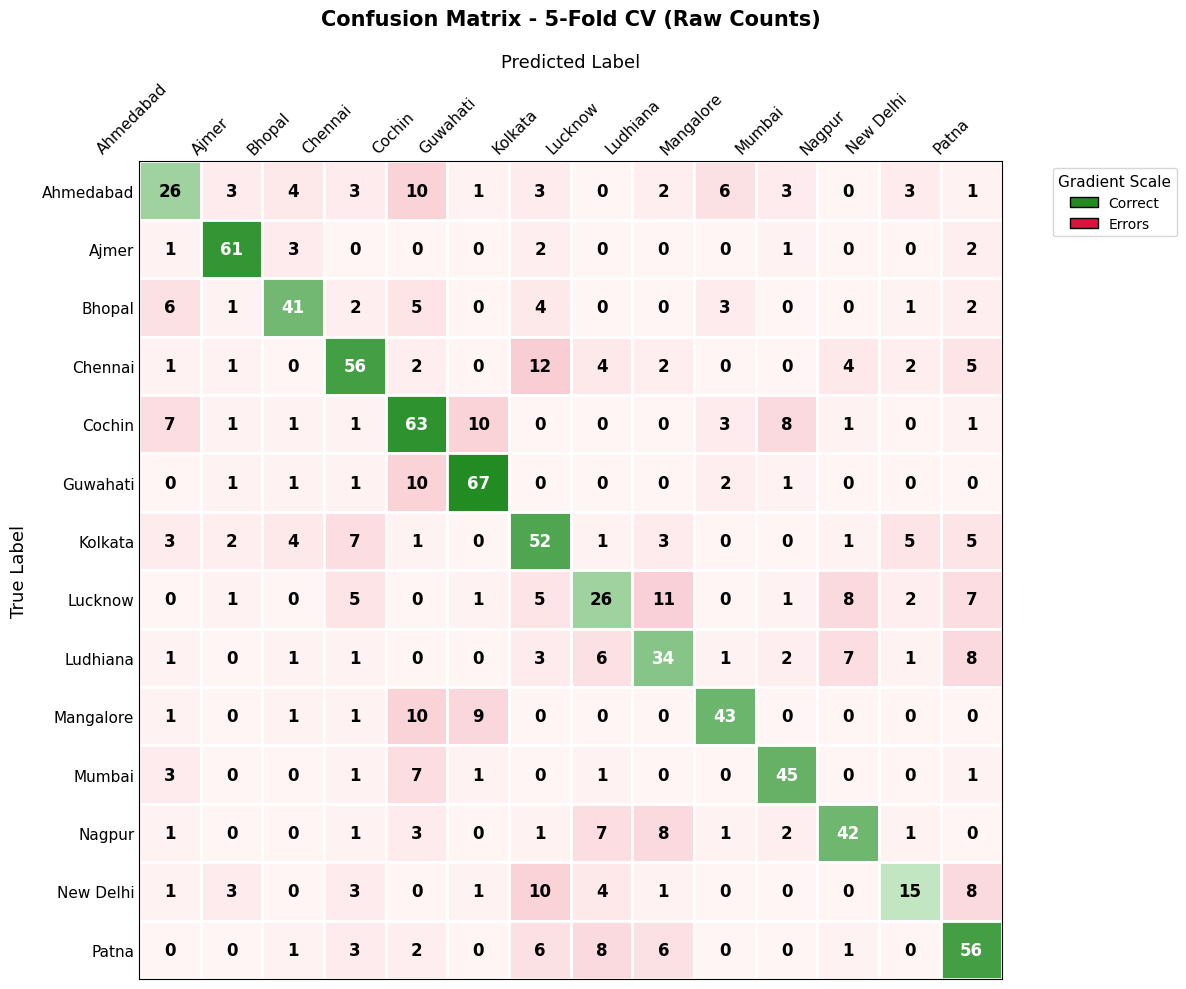

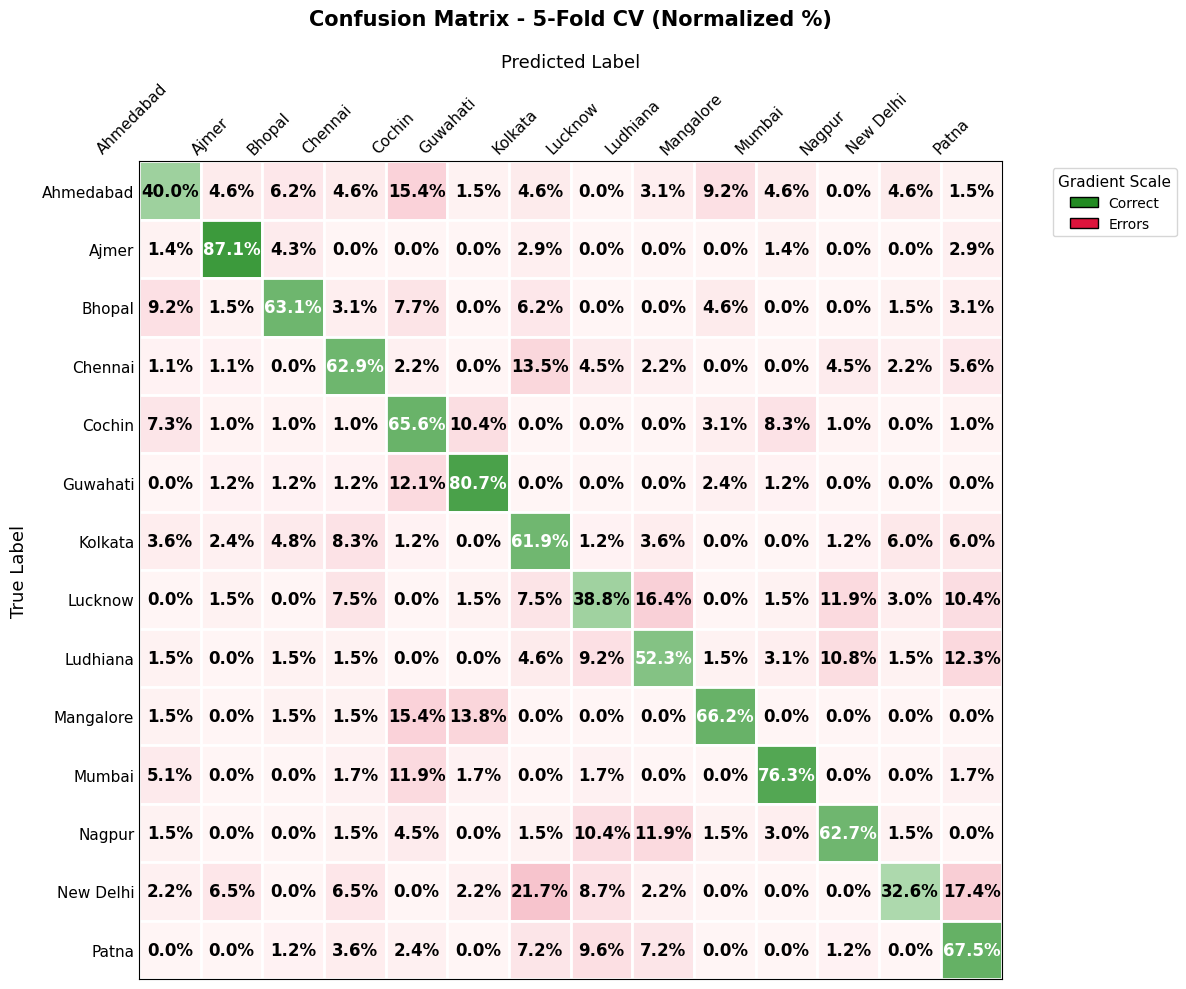

✅ CV confusion matrix plots displayed

SHAP VALUE CALCULATION
TreeExplainer created successfully
Calculating SHAP values...


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.patches import Patch
import shap

# -----------------------------
# 0. Plotting setup
# -----------------------------
rcParams['font.size'] = 10
rcParams['figure.dpi'] = 100

# IMPORTANT: Assumes these variables are already defined in your environment:
# - model: trained LightGBM classifier
# - X_model: feature matrix (CLR-transformed)
# - y_encoded: encoded target labels
# - le: LabelEncoder with fitted classes
# - cm_cv: confusion matrix from cross-validation
# - cm_cv_normalized: normalized confusion matrix from CV

print("="*70)
print("SHAP & CONFUSION MATRIX VISUALIZATION")
print("="*70)
print(f"Data shape: {X_model.shape}")
print(f"Number of classes: {len(le.classes_)}")
print(f"Classes: {le.classes_}")

# -----------------------------
# 1. GRADIENT CONFUSION MATRIX PLOTTING FUNCTION
# -----------------------------
def plot_confusion_matrix_custom(cm, class_labels, title, normalize=False, figsize=(12, 10)):
    """
    Plot confusion matrix with gradient coloring:
    - Diagonal: light pastel green → deep green (correct predictions)
    - Off-diagonal: light pastel red → deep red (errors)
    """
    green_light = np.array([240, 255, 240]) / 255.0
    green_dark = np.array([34, 139, 34]) / 255.0
    red_light = np.array([255, 245, 245]) / 255.0
    red_dark = np.array([220, 20, 60]) / 255.0
    
    fig, ax = plt.subplots(figsize=figsize)
    
    if normalize:
        cm_display = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm_display = np.round(cm_display * 100, 2)
        annot_suffix = '%'
        max_value = 100.0
    else:
        cm_display = cm
        annot_suffix = ''
        max_value = cm_display.max()
    
    n_classes = len(class_labels)
    
    for i in range(n_classes):
        for j in range(n_classes):
            value = cm_display[i, j]
            intensity = value / max_value if max_value > 0 else 0
            intensity = np.clip(intensity, 0, 1)
            
            if i == j:
                color = green_light + intensity * (green_dark - green_light)
            else:
                color = red_light + intensity * (red_dark - red_light)
            
            rect = plt.Rectangle((j, i), 1, 1, facecolor=color,
                                edgecolor='white', linewidth=2)
            ax.add_patch(rect)
            
            if normalize:
                text = f'{value:.1f}{annot_suffix}'
            else:
                text = f'{int(value)}'
            
            text_color = 'white' if intensity > 0.5 else 'black'
            ax.text(j + 0.5, i + 0.5, text, ha='center', va='center',
                   fontsize=12, weight='bold', color=text_color)
    
    ax.set_xlim(0, n_classes)
    ax.set_ylim(0, n_classes)
    ax.set_xticks(np.arange(n_classes) + 0.5)
    ax.set_yticks(np.arange(n_classes) + 0.5)
    ax.set_xticklabels(class_labels, fontsize=11, rotation=45, ha='right')
    ax.set_yticklabels(class_labels, fontsize=11)
    ax.xaxis.tick_top()
    ax.xaxis.set_label_position('top')
    ax.tick_params(length=0)
    ax.invert_yaxis()
    ax.set_xlabel('Predicted Label', fontsize=13, labelpad=10)
    ax.set_ylabel('True Label', fontsize=13, labelpad=10)
    ax.set_title(title, fontsize=15, pad=20, weight='bold')
    
    legend_elements = [
        Patch(facecolor=green_dark, edgecolor='black', linewidth=1, label='Correct'),
        Patch(facecolor=red_dark, edgecolor='black', linewidth=1, label='Errors')
    ]
    ax.legend(handles=legend_elements, loc='upper left', bbox_to_anchor=(1.05, 1),
             fontsize=10, title='Gradient Scale', title_fontsize=11)
    
    plt.tight_layout()
    return fig, ax

# -----------------------------
# 2. PLOT CONFUSION MATRICES
# -----------------------------
print("\n" + "="*70)
print("PLOTTING CONFUSION MATRICES")
print("="*70)

print("\nGenerating CV Confusion Matrices with Gradient Colors...")

fig, ax = plot_confusion_matrix_custom(
    cm_cv, le.classes_, 'Confusion Matrix - 5-Fold CV (Raw Counts)',
    normalize=False, figsize=(12, 10)
)
plt.show()

fig, ax = plot_confusion_matrix_custom(
    cm_cv, le.classes_, 'Confusion Matrix - 5-Fold CV (Normalized %)',
    normalize=True, figsize=(12, 10)
)
plt.show()

print("✅ CV confusion matrix plots displayed")

# -----------------------------
# 3. SHAP VALUE CALCULATION
# -----------------------------
print("\n" + "="*70)
print("SHAP VALUE CALCULATION")
print("="*70)

explainer = shap.TreeExplainer(model)
print("TreeExplainer created successfully")

print("Calculating SHAP values...")